# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

input_fd = open("C:/Users/이현주/Desktop/ESAA 수업자료/youtube-new/KRvideos.csv",errors = 'backslashreplace',encoding='utf-8')
KR = pd.read_csv(input_fd) 
US = pd.read_csv('C:/Users/이현주/Desktop/ESAA 수업자료/youtube-new/USvideos.csv')

# 데이터 살펴보기

In [2]:
print(KR.shape)
print(US.shape)

(34567, 16)
(40949, 16)


In [7]:
KRUS = pd.concat([KR, US])
print(KRUS.head)

<bound method NDFrame.head of           video_id trending_date  \
0      RxGQe4EeEpA      17.14.11   
1      hH7wVE8OlQ0      17.14.11   
2      9V8bnWUmE9U      17.14.11   
3      0_8py-t5R80      17.14.11   
4      bk55RbxiQdI      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                                     좋아 by 민서_윤종신_좋니 답가   
1                                       JSA 귀순 북한군 총격 부상   
2                             나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)   
3                             이명박 출국 현장, 놓치면 안되는 장면   
4                                김장겸은 물러갔다 MBC 노조 환호와 눈물   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism 

In [14]:
print(KRUS.shape)

(75516, 16)


In [18]:
missing = KRUS[KRUS.isna().any(axis=1)] #missing data는 몇 개인가
print(missing.shape)

(3733, 16)


In [8]:
print(KRUS.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [9]:
print(KRUS.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


인기영상의 vies, likes 통계값

In [91]:
def summary_numeric(col):  
    print(col)
    print("평균 {:>15}".format(format(df[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(df[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(df[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(df[col].max(), ",.2f")))

In [92]:
summary_numeric("views") #인기영상의 views, likes 통계값
summary_numeric("likes")

views
평균      374,157.77
최소        2,050.00
중앙       93,969.50
최대  113,876,217.00
likes
평균        9,500.48
최소            0.00
중앙        1,262.00
최대    5,150,839.00


In [148]:
df = KRUS.drop_duplicates(["video_id"])[:] 
#여러 날에 걸쳐 인기동영상이 된 경우, 일자별로 데이터 생성.처음으로 인기동영상이 되었을 때의 경우만 고려
df.sort_values(by=['views'], ascending = False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending-publish,publish_year,publish_month
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,27 days,2018,5
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",8 days,2017,12
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,24 days,2018,4
34888,zEf423kYfqk,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,25 days,2018,4
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,14 days,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,qg0GdM60syI,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,27,2017-03-31,"90s commercials|""Huffy""",773,2,0,0,https://i.ytimg.com/vi/qg0GdM60syI/default.jpg,False,False,False,Anyone have one of those?,228 days,2017,3
12716,zeQaJGkFyqQ,2018-01-18,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,25,2018-01-16,"news|""associated press""|""ap""|""ap online""|""asso...",748,9,0,0,https://i.ytimg.com/vi/zeQaJGkFyqQ/default.jpg,True,False,False,Three deputies and one police officer were sho...,2 days,2018,1
14984,dQMZLXaa1L8,2018-01-29,Artwork Forge,Palo Alto Online,17,2018-01-10,[none],745,1,0,0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...,19 days,2018,1
777,-JVITToppE0,2017-11-17,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,2017-11-13,"Oregon|""Ducks""|""college athletics""|""college fo...",704,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...,4 days,2017,11


In [149]:
views = KRUS['views'] 
print(views.max())

225211923


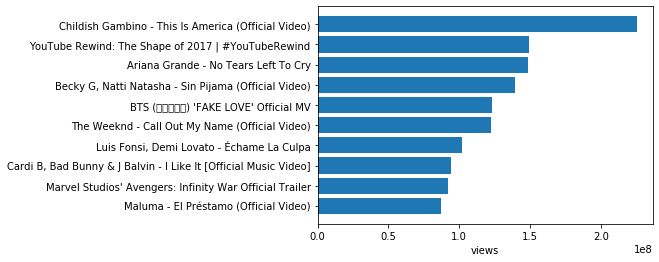

In [151]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(range(df.head(10).shape[0]),df.head(10)['views'])
ax.set_yticks(range(df.head(10).shape[0]))
ax.set_yticklabels(df.head(10)['title'])
ax.invert_yaxis()  
ax.set_xlabel('views')
plt.show()

# * 동영상 게시 후 인기영상 진입에 걸린 일수

In [104]:
import datetime

업로드 일자 YYYY-MM-DD 형식으로 바꾸기

In [105]:
KRUS['publish_time'] =  pd.to_datetime(KRUS['publish_time'])
KRUS["publish_time"] = KRUS["publish_time"].apply(lambda x : x.date()) #시간은 제거하고 YYYY-MM-DD 형식으로 표시
KRUS["publish_time"] = pd.to_datetime(KRUS["publish_time"])
KRUS['publish_time']

38547   2018-05-06
38345   2018-05-06
38146   2018-05-06
37935   2018-05-06
37730   2018-05-06
           ...    
546     2017-11-13
14531   2018-01-10
14782   2018-01-23
14563   2018-01-23
14335   2018-01-23
Name: publish_time, Length: 75516, dtype: datetime64[ns]

인기 영상 진입 일자 YYYY-MM-DD 형식으로 바꾸기

In [106]:
KRUS["trending_date"] = pd.to_datetime(KRUS["trending_date"], format = "%y.%d.%m")
df["trending_date"] = pd.to_datetime(df["trending_date"], format = "%y.%d.%m")
KRUS["trending_date"]

38547   2018-06-02
38345   2018-06-01
38146   2018-05-31
37935   2018-05-30
37730   2018-05-29
           ...    
546     2017-11-16
14531   2018-01-27
14782   2018-01-28
14563   2018-01-27
14335   2018-01-26
Name: trending_date, Length: 75516, dtype: datetime64[ns]

동영상 게시 후 인기영상이 되는 데까지 걸리는 기간 구하기

In [108]:
KRUS["trending-publish"] = KRUS["trending_date"] - KRUS["publish_time"]
KRUS["trending-publish"].head(10)

38547   27 days
38345   26 days
38146   25 days
37935   24 days
37730   23 days
37531   22 days
37333   21 days
37123   20 days
36913   19 days
36710   18 days
Name: trending-publish, dtype: timedelta64[ns]

In [109]:
KRUS["trending-publish"].describe()

count                       75516
mean      10 days 07:52:21.204512
std      109 days 07:26:40.495109
min               0 days 00:00:00
25%               2 days 00:00:00
50%               3 days 00:00:00
75%               6 days 00:00:00
max            4215 days 00:00:00
Name: trending-publish, dtype: object

** 역주행하는 영상 등 일부 이상치를 제외하면 인기 영상이 되는 결정적인 기간은 2일에서 6일이라고 볼 수 있다. 
2~6일 안에 필사적으로 마케팅을 해야한다.

# * 동영상 게시일 Year, Month별 조회수, 좋아요 수

publish_time에서 year만 추출하기

In [121]:
KRUS['publish_year'] = KRUS['publish_time'].dt.year
KRUS['publish_year']

38547    2018
38345    2018
38146    2018
37935    2018
37730    2018
         ... 
546      2017
14531    2018
14782    2018
14563    2018
14335    2018
Name: publish_year, Length: 75516, dtype: int64

In [134]:
year_viewsum = KRUS.groupby(['publish_year']).views.sum()
year_viewsum

publish_year
2006         258506
2008         627600
2009         342566
2010        1006586
2011        1385668
2012        1630184
2013        1198995
2014        2814324
2015        3344903
2016        5330334
2017    17666324052
2018    93676658747
Name: views, dtype: int64

** 2006년부터 2018년까지 데이터가 있으며 시간이 갈수록 조회수가 증가하는 추세를 보임. 특히 2017년부터 조회수가 폭증함. 
하지만 오래 전일수록 missing data가 많다는 점도 고려해야함.

publish_time에서 month만 추출하기

In [122]:
KRUS['publish_month'] = KRUS['publish_time'].dt.month
KRUS['publish_month']

38547     5
38345     5
38146     5
37935     5
37730     5
         ..
546      11
14531     1
14782     1
14563     1
14335     1
Name: publish_month, Length: 75516, dtype: int64

월별 평균 조회수

In [137]:
meanview_of_yearmonth=KRUS.groupby(['publish_year','publish_month']).views.mean()
print(meanview_of_yearmonth)

publish_year  publish_month
2006          7                2.585060e+05
2008          4                5.006425e+04
              6                8.683025e+04
              8                2.667400e+04
2009          3                1.542900e+04
                                   ...     
2018          2                1.001543e+06
              3                1.297452e+06
              4                2.380266e+06
              5                2.966923e+06
              6                1.119022e+06
Name: views, Length: 67, dtype: float64


In [140]:
meanview_of_yearmonth.nlargest(10)

publish_year  publish_month
2018          5                2.966923e+06
              4                2.380266e+06
              3                1.297452e+06
              6                1.119022e+06
              2                1.001543e+06
2017          11               9.753666e+05
              12               9.109745e+05
2016          2                8.092263e+05
2018          1                7.818322e+05
2017          9                5.565971e+05
Name: views, dtype: float64

** 평균 조회수가 가장 많은 달은 2018년 1..6월, 2017년 9..12월, 2016년 2월

월별 평균 좋아요수

In [128]:
meanlike_of_yearmonth=KRUS.groupby(['publish_year','publish_month']).likes.mean()
print(meanlike_of_yearmonth)

publish_year  publish_month
2006          7                  459.000000
2008          4                   46.000000
              6                  469.000000
              8                   78.333333
2009          3                   33.500000
                                   ...     
2018          2                27014.854184
              3                42494.448515
              4                65989.207551
              5                89349.594710
              6                44864.217781
Name: likes, Length: 67, dtype: float64


In [141]:
meanlike_of_yearmonth.nlargest(10)

publish_year  publish_month
2018          5                89349.594710
              4                65989.207551
              6                44864.217781
              3                42494.448515
2017          11               34798.215432
              12               30242.630983
2018          1                28416.924627
              2                27014.854184
2017          9                14371.533333
2015          10                6857.625000
Name: likes, dtype: float64

** 평균 좋아요 수가 가장 많은 달은 2018년 1..6월, 2017년 9..12월, 2015년 10월